## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  11.559020  1754.287262  0.253900   7.612036  1.402739
1  60.623390   938.110979  0.316295   1.951624  1.399001
2  34.325449  1075.936918  0.420762   8.394084  1.374295
3  77.364311  1597.131348  0.395087  10.647707  1.466604
4  59.071801  1213.749731  0.993036   5.682215  1.476788


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 1.0177276	total: 59.7ms	remaining: 59.7s
1:	learn: 1.0066852	total: 60.9ms	remaining: 30.4s
2:	learn: 0.9979226	total: 61.5ms	remaining: 20.4s
3:	learn: 0.9868969	total: 62ms	remaining: 15.4s
4:	learn: 0.9767437	total: 62.9ms	remaining: 12.5s
5:	learn: 0.9669174	total: 63.6ms	remaining: 10.5s
6:	learn: 0.9567039	total: 64ms	remaining: 9.08s
7:	learn: 0.9457982	total: 65.2ms	remaining: 8.08s
8:	learn: 0.9371665	total: 66.1ms	remaining: 7.27s
9:	learn: 0.9249490	total: 66.9ms	remaining: 6.62s
10:	learn: 0.9153372	total: 67.5ms	remaining: 6.07s
11:	learn: 0.9064262	total: 68.2ms	remaining: 5.62s
12:	learn: 0.8972850	total: 68.8ms	remaining: 5.22s
13:	learn: 0.8889885	total: 69.3ms	remaining: 4.88s
14:	learn: 0.8772325	total: 70.1ms	remaining: 4.6s
15:	learn: 0.8682982	total: 70.7ms	remaining: 4.34s
16:	learn: 0.8601778	total: 71.4ms	remaining: 4.13s
17:	learn: 0.8502594	total: 72ms	remaining: 3.93s
18:	learn: 0.8410771	total: 72.6ms	remaining: 3.75s
19:	learn: 0.8330167	total: 7

200:	learn: 0.1922718	total: 161ms	remaining: 638ms
201:	learn: 0.1910317	total: 161ms	remaining: 637ms
202:	learn: 0.1899643	total: 162ms	remaining: 635ms
203:	learn: 0.1889550	total: 162ms	remaining: 633ms
204:	learn: 0.1877585	total: 163ms	remaining: 630ms
205:	learn: 0.1865133	total: 163ms	remaining: 628ms
206:	learn: 0.1854936	total: 163ms	remaining: 626ms
207:	learn: 0.1845059	total: 164ms	remaining: 623ms
208:	learn: 0.1834651	total: 164ms	remaining: 621ms
209:	learn: 0.1827416	total: 165ms	remaining: 619ms
210:	learn: 0.1815619	total: 165ms	remaining: 617ms
211:	learn: 0.1807686	total: 165ms	remaining: 615ms
212:	learn: 0.1796295	total: 166ms	remaining: 613ms
213:	learn: 0.1785582	total: 166ms	remaining: 611ms
214:	learn: 0.1772709	total: 167ms	remaining: 609ms
215:	learn: 0.1763539	total: 167ms	remaining: 607ms
216:	learn: 0.1753172	total: 168ms	remaining: 605ms
217:	learn: 0.1741409	total: 168ms	remaining: 602ms
218:	learn: 0.1733090	total: 168ms	remaining: 600ms
219:	learn: 

303:	learn: 0.1128729	total: 211ms	remaining: 482ms
304:	learn: 0.1123876	total: 211ms	remaining: 481ms
305:	learn: 0.1120669	total: 212ms	remaining: 480ms
306:	learn: 0.1116706	total: 213ms	remaining: 480ms
307:	learn: 0.1113519	total: 214ms	remaining: 480ms
308:	learn: 0.1106622	total: 215ms	remaining: 480ms
309:	learn: 0.1101474	total: 215ms	remaining: 479ms
310:	learn: 0.1095650	total: 215ms	remaining: 477ms
311:	learn: 0.1090116	total: 216ms	remaining: 476ms
312:	learn: 0.1086334	total: 216ms	remaining: 475ms
313:	learn: 0.1082075	total: 217ms	remaining: 473ms
314:	learn: 0.1075802	total: 217ms	remaining: 472ms
315:	learn: 0.1069650	total: 218ms	remaining: 472ms
316:	learn: 0.1066554	total: 218ms	remaining: 470ms
317:	learn: 0.1063651	total: 219ms	remaining: 469ms
318:	learn: 0.1057387	total: 219ms	remaining: 468ms
319:	learn: 0.1054462	total: 220ms	remaining: 467ms
320:	learn: 0.1049728	total: 220ms	remaining: 465ms
321:	learn: 0.1045102	total: 220ms	remaining: 464ms
322:	learn: 

502:	learn: 0.0570244	total: 309ms	remaining: 305ms
503:	learn: 0.0567372	total: 309ms	remaining: 304ms
504:	learn: 0.0564548	total: 310ms	remaining: 304ms
505:	learn: 0.0561093	total: 310ms	remaining: 303ms
506:	learn: 0.0559608	total: 311ms	remaining: 302ms
507:	learn: 0.0558981	total: 311ms	remaining: 301ms
508:	learn: 0.0557299	total: 311ms	remaining: 300ms
509:	learn: 0.0556442	total: 312ms	remaining: 300ms
510:	learn: 0.0555833	total: 312ms	remaining: 299ms
511:	learn: 0.0555261	total: 313ms	remaining: 298ms
512:	learn: 0.0553767	total: 314ms	remaining: 298ms
513:	learn: 0.0552824	total: 314ms	remaining: 297ms
514:	learn: 0.0552019	total: 314ms	remaining: 296ms
515:	learn: 0.0551441	total: 315ms	remaining: 295ms
516:	learn: 0.0550875	total: 315ms	remaining: 294ms
517:	learn: 0.0549883	total: 316ms	remaining: 294ms
518:	learn: 0.0548948	total: 316ms	remaining: 293ms
519:	learn: 0.0548420	total: 317ms	remaining: 292ms
520:	learn: 0.0547499	total: 317ms	remaining: 292ms
521:	learn: 

604:	learn: 0.0477228	total: 361ms	remaining: 235ms
605:	learn: 0.0474483	total: 361ms	remaining: 235ms
606:	learn: 0.0473959	total: 362ms	remaining: 234ms
607:	learn: 0.0472613	total: 362ms	remaining: 233ms
608:	learn: 0.0471288	total: 363ms	remaining: 233ms
609:	learn: 0.0469983	total: 363ms	remaining: 232ms
610:	learn: 0.0469484	total: 364ms	remaining: 232ms
611:	learn: 0.0468281	total: 364ms	remaining: 231ms
612:	learn: 0.0467794	total: 365ms	remaining: 230ms
613:	learn: 0.0466608	total: 365ms	remaining: 229ms
614:	learn: 0.0463982	total: 366ms	remaining: 229ms
615:	learn: 0.0463505	total: 366ms	remaining: 228ms
616:	learn: 0.0462219	total: 367ms	remaining: 228ms
617:	learn: 0.0459976	total: 367ms	remaining: 227ms
618:	learn: 0.0459506	total: 367ms	remaining: 226ms
619:	learn: 0.0458372	total: 368ms	remaining: 225ms
620:	learn: 0.0457892	total: 368ms	remaining: 225ms
621:	learn: 0.0457439	total: 369ms	remaining: 224ms
622:	learn: 0.0456977	total: 369ms	remaining: 223ms
623:	learn: 

786:	learn: 0.0264142	total: 460ms	remaining: 125ms
787:	learn: 0.0263981	total: 461ms	remaining: 124ms
788:	learn: 0.0262547	total: 461ms	remaining: 123ms
789:	learn: 0.0262132	total: 461ms	remaining: 123ms
790:	learn: 0.0261975	total: 462ms	remaining: 122ms
791:	learn: 0.0260856	total: 462ms	remaining: 121ms
792:	learn: 0.0260448	total: 463ms	remaining: 121ms
793:	learn: 0.0259363	total: 464ms	remaining: 120ms
794:	learn: 0.0258672	total: 464ms	remaining: 120ms
795:	learn: 0.0257282	total: 465ms	remaining: 119ms
796:	learn: 0.0255925	total: 465ms	remaining: 119ms
797:	learn: 0.0254871	total: 466ms	remaining: 118ms
798:	learn: 0.0253847	total: 466ms	remaining: 117ms
799:	learn: 0.0252325	total: 467ms	remaining: 117ms
800:	learn: 0.0251334	total: 467ms	remaining: 116ms
801:	learn: 0.0249861	total: 468ms	remaining: 115ms
802:	learn: 0.0248766	total: 468ms	remaining: 115ms
803:	learn: 0.0248399	total: 468ms	remaining: 114ms
804:	learn: 0.0247449	total: 469ms	remaining: 114ms
805:	learn: 

893:	learn: 0.0183944	total: 513ms	remaining: 60.9ms
894:	learn: 0.0183771	total: 514ms	remaining: 60.3ms
895:	learn: 0.0183572	total: 514ms	remaining: 59.7ms
896:	learn: 0.0183401	total: 515ms	remaining: 59.1ms
897:	learn: 0.0183206	total: 515ms	remaining: 58.5ms
898:	learn: 0.0183038	total: 516ms	remaining: 57.9ms
899:	learn: 0.0182322	total: 516ms	remaining: 57.3ms
900:	learn: 0.0182130	total: 517ms	remaining: 56.8ms
901:	learn: 0.0181995	total: 517ms	remaining: 56.2ms
902:	learn: 0.0180722	total: 518ms	remaining: 55.6ms
903:	learn: 0.0179766	total: 520ms	remaining: 55.2ms
904:	learn: 0.0179000	total: 520ms	remaining: 54.6ms
905:	learn: 0.0177774	total: 521ms	remaining: 54ms
906:	learn: 0.0177036	total: 521ms	remaining: 53.4ms
907:	learn: 0.0176376	total: 522ms	remaining: 52.8ms
908:	learn: 0.0176108	total: 522ms	remaining: 52.2ms
909:	learn: 0.0175395	total: 522ms	remaining: 51.6ms
910:	learn: 0.0175134	total: 523ms	remaining: 51.1ms
911:	learn: 0.0174974	total: 523ms	remaining: 50

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.30605928934079857


ABC Pre-generator MAE 0.2978123212109697


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

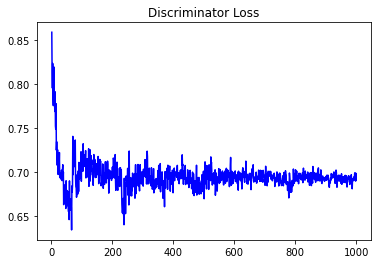

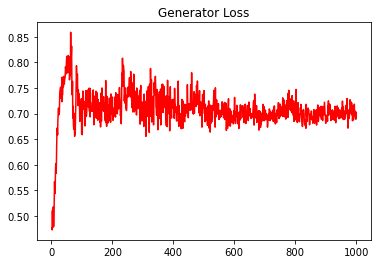

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.6568651467077434


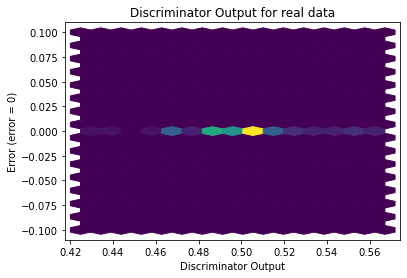

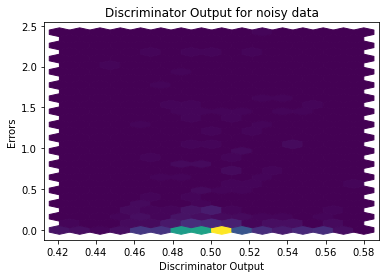

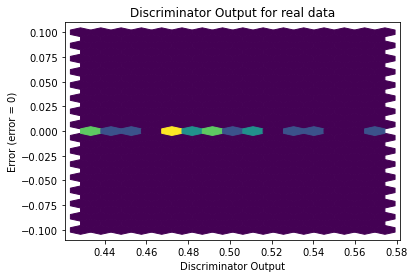

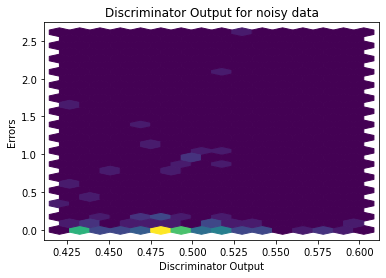

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

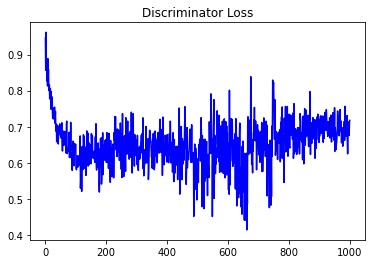

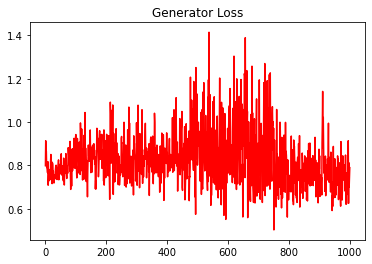

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.9050057537802495


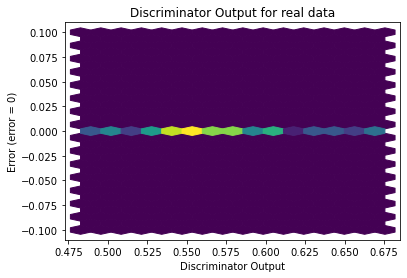

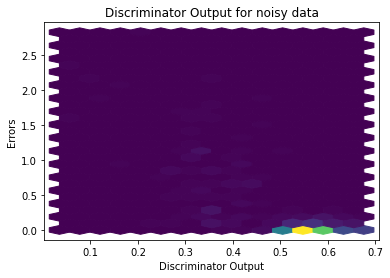

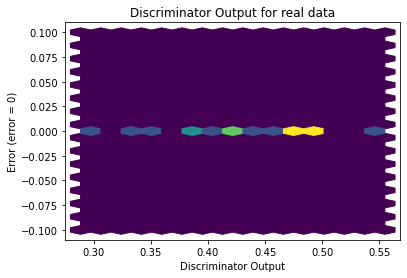

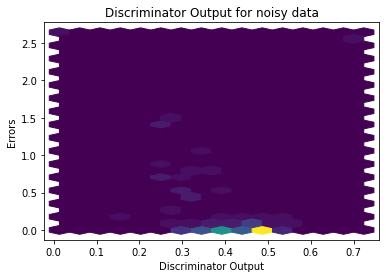

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


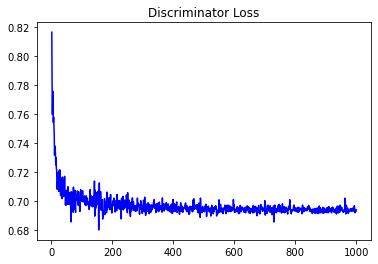

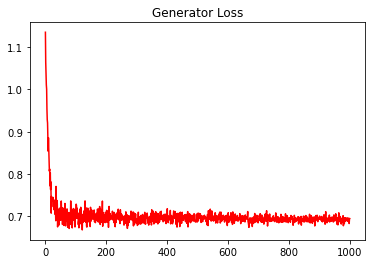

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.31596929194778206


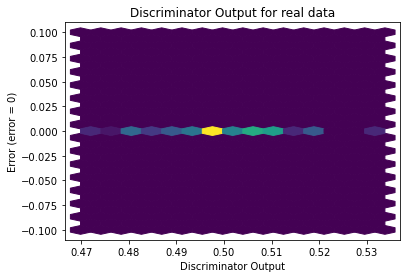

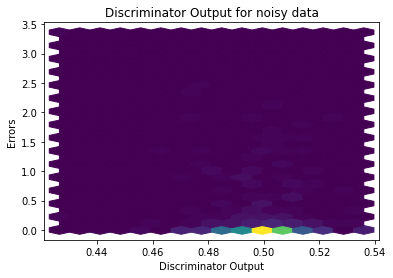

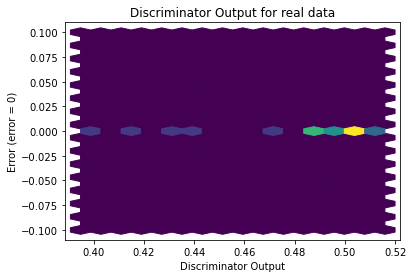

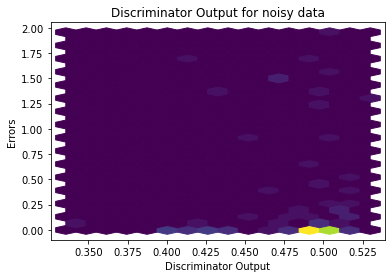

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


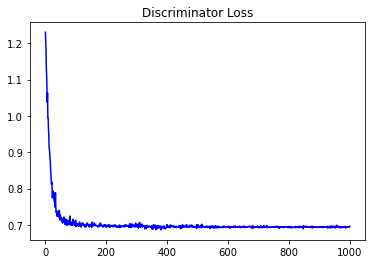

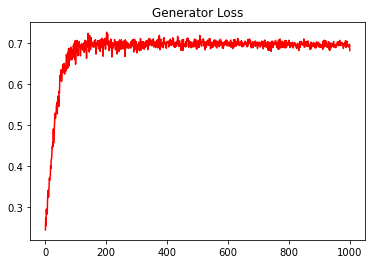

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.2912991418783786


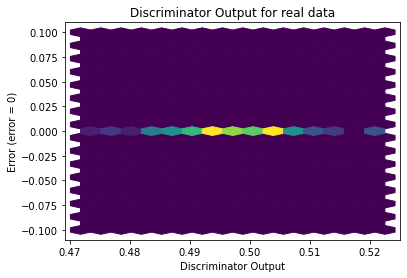

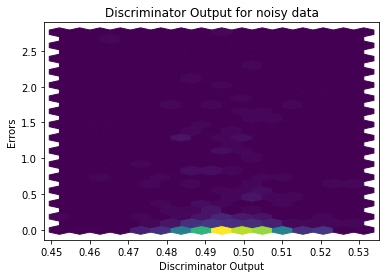

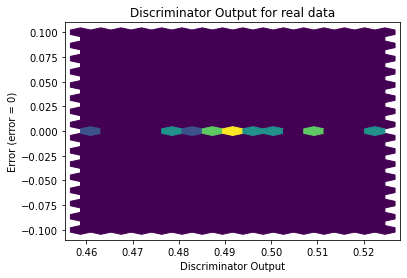

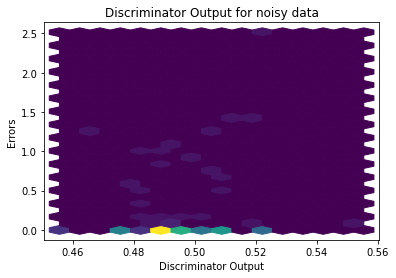

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1201]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0214]], requires_grad=True)
